            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
Epoch 1/200


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1858
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0311 
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 
Epoch 15/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 
Ep

C:\Users\kkpr2\AppData\Local\Temp\ipykernel_12300\3075466891.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(actual_values.index[-1], periods=13, freq='M')[1:], predicted_values, label='Predicted Values', color='red')


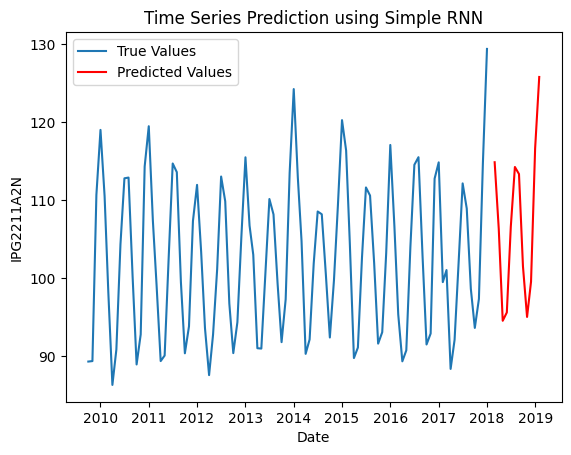

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
data = pd.read_csv('time.csv', parse_dates=['DATE'], index_col='DATE')
print(data.head())
data = data[['IPG2211A2N']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
sequence_length=50
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(generator, epochs=200, verbose=1)
input_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
predicted_values = []
for _ in range(12):
    predicted = model.predict(input_sequence)
    predicted_values.append(predicted[0][0])
    input_sequence = np.append(input_sequence[:, 1:, :], predicted.reshape(1, 1, 1), axis=1)
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))
actual_values = data.tail(100)  
plt.plot(actual_values.index, actual_values, label='True Values')
plt.plot(pd.date_range(actual_values.index[-1], periods=13, freq='M')[1:], predicted_values, label='Predicted Values', color='red')
plt.xlabel("Date")
plt.ylabel("IPG2211A2N")
plt.legend()
plt.title("Time Series Prediction using Simple RNN")
plt.show()


            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
Epoch 1/200


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2489
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1080 
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 
Epoch 15/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 
Ep

C:\Users\kkpr2\AppData\Local\Temp\ipykernel_12300\3122199727.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='M')[1:]


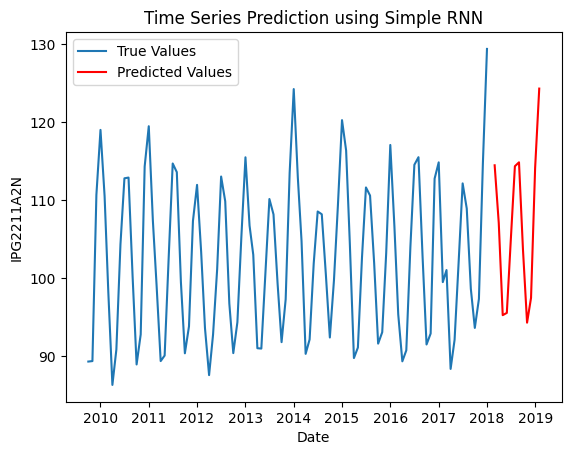

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Step 1: Load Data
data = pd.read_csv('time.csv', parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess Data
data = data[['IPG2211A2N']]

# Normalize the data (scaling the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create Sequences for the RNN
sequence_length = 50  # Number of previous time steps to use for prediction
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)

# Step 4: Build the Simple RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer (predict the next value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(generator, epochs=200, verbose=1)

# Step 6: Predict Future Values
input_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)

# Define the number of future steps (months) to predict
future_steps = 12
predicted_values = []

for _ in range(future_steps):
    predicted = model.predict(input_sequence)
    predicted_values.append(predicted[0][0])
    
    # Update the input sequence for the next prediction
    input_sequence = np.append(input_sequence[:, 1:, :], predicted.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted values to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))
print(predicted_values)
# Step 7: Generate Dates for Predictions
# Get the last date in the dataset
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='M')[1:]

# Print the future dates with their corresponding predicted values
for date, value in zip(future_dates, predicted_values):
    print(f"{date.date()}: {value[0]:.2f}")

# Step 8: Plot the Results
# Get the actual values to plot
actual_values = data.tail(100)  # Get the last 100 actual values

# Plot the true values and the predicted future values
plt.plot(actual_values.index, actual_values, label='True Values')
plt.plot(future_dates, predicted_values, label='Predicted Values', color='red')
plt.xlabel("Date")
plt.ylabel("IPG2211A2N")
plt.legend()
plt.title("Time Series Prediction using Simple RNN")
plt.show()
